<!-- Title Section -->
<div style="background-color:#329ba8; padding: 20px; border-radius: 10px;">

# Personality Classification Notebook
</div>

---

<!-- Table of Contents -->
<div style="background-color:#2e4b4f; padding: 15px; border-radius: 10px;">

## 📚 Table of Contents
1. 🔍 [**Introduction**](#introduction)
2. 📊 [**Exploratory Data Analysis**](#exploratory-data-analysis)
3. 🧼 [**Data Preprocessing**](#data-preprocessing)
4. 🧰 [**Feature Engineering**](#feature-engineering)
5. 🤖 [**Model Training and Evaluation**](#model-training-and-evaluation)
6. 🔎 [**Feature Importance & Interpretability**](#feature-importance--interpretability)
7. 🏁 [**Conclusion**](#conclusion)

</div>

---

<!-- Introduction -->
<div style="background-color:#424ba6; padding: 20px; border-radius: 10px;">

## 🔍 Introduction

🎯 This notebook aims to classify individuals as **Introverts** or **Extroverts** based on social behavior features from a personality dataset.

The workflow includes:

- **Advanced Preprocessing**
  Handle missing values and encode categorical variables.
- **Feature Engineering**
  Extract meaningful patterns to enhance model input.
- **Model Training**
  Apply and compare:  
  `Logistic Regression` | `Random Forest` | `Gradient Boosting` | `XGBoost` | `SVM`.
- **Hyperparameter Tuning**
  Optimize models using `GridSearchCV` or `RandomizedSearchCV`.
- **Interpretability Analysis**  
  Understand which features drive predictions.

🎯 The goal is to achieve **high accuracy** (e.g., F1-score, AUC) and build a **polished, insightful notebook**.

</div>

---


In [293]:
#import the libraires and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
df = pd.read_csv('personality_dataset.csv')

#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Exploratory Data Analysis </h2>
</div>

In [294]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [296]:
df.shape

(2900, 8)

In [297]:
df.isnull().sum().sort_values(ascending=False)

Friends_circle_size          77
Stage_fear                   73
Going_outside                66
Post_frequency               65
Time_spent_Alone             63
Social_event_attendance      62
Drained_after_socializing    52
Personality                   0
dtype: int64

In [298]:
# Display value counts for all columns in the dataframe
for col in df.columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))


Value counts for 'Time_spent_Alone':
Time_spent_Alone
0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
5.0     180
8.0     180
6.0     150
11.0    140
NaN      63
Name: count, dtype: int64

Value counts for 'Stage_fear':
Stage_fear
No     1417
Yes    1410
NaN      73
Name: count, dtype: int64

Value counts for 'Social_event_attendance':
Social_event_attendance
2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
NaN      62
10.0     14
Name: count, dtype: int64

Value counts for 'Going_outside':
Going_outside
0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
NaN     66
Name: count, dtype: int64

Value counts for 'Drained_after_socializing':
Drained_after_socializing
No     1441
Yes    1407
NaN      52
Name: count, dtype: int64

Value counts for 'Friends_circle_size':
Friends_circle_size
5.0     301
3.0     283
1.0     281
2.0     274
4

#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">First, let's deal with data types </h2>
</div>

In [299]:
#stagefear,drained,personality dtypes
df['Stage_fear'] = df['Stage_fear'].astype('category')
df['Drained_after_socializing'] = df['Drained_after_socializing'].astype('category')
df['Personality'] = df['Personality'].astype('category')


In [300]:
#make all the floated columns integers
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('Int64')
    

#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Now let's deal with null values </h2>
</div>

#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">created a function to imupte missing values </h2>
</div>

In [301]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import warnings

# Configuration
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [302]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2837 non-null   Int64   
 1   Stage_fear                 2827 non-null   category
 2   Social_event_attendance    2838 non-null   Int64   
 3   Going_outside              2834 non-null   Int64   
 4   Drained_after_socializing  2848 non-null   category
 5   Friends_circle_size        2823 non-null   Int64   
 6   Post_frequency             2835 non-null   Int64   
 7   Personality                2900 non-null   category
dtypes: Int64(5), category(3)
memory usage: 136.4 KB


<div style="background-color:#f0f8ff; padding:15px; border-radius:10px;">

<h1 style="color:#4B0082;"> Imputation Strategy</h1>

<p style="color:#333333; font-size:16px;">
We will use the <strong style="color:#008080;">custom imputation function</strong> only for 
<strong style="color:#DC143C;">categorical columns</strong>, as it is well-suited for handling 
categorical data. For <strong style="color:#00008B;">numeric columns</strong>, we will impute 
missing values using the <strong style="color:#228B22;">median</strong> of each column. This 
approach ensures <em style="color:#FF8C00;">robust</em> and <em style="color:#8B0000;">appropriate</em> 
handling of missing data for both types of features.
</p>

</div>


In [304]:
# Column Definitions
CATEGORICAL_COLS = ["Stage_fear", "Drained_after_socializing", "Personality"]
BOOL_COLS = []
NUMERIC_COLS = []


# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in BOOL_COLS:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in BOOL_COLS:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


#remove warnings
import warnings
warnings.filterwarnings("ignore")

for col in missing_data_cols:
    print("missing values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2)) + "%")
    if col in CATEGORICAL_COLS:
        df[col] = impute_categorical_missing_data(col)
    elif col in NUMERIC_COLS:
        df[col] = impute_continuous_missing_data(col)
    elif col in BOOL_COLS:
        df[col] = impute_categorical_missing_data(col)    
    else:
        pass


missing values Time_spent_Alone : 2.17%
missing values Stage_fear : 2.52%


The feature 'Stage_fear' has been imputed with 100.0 accuracy

missing values Social_event_attendance : 2.14%
missing values Going_outside : 2.28%
missing values Drained_after_socializing : 1.79%
The feature 'Drained_after_socializing' has been imputed with 100.0 accuracy

missing values Friends_circle_size : 2.66%
missing values Post_frequency : 2.24%


In [305]:
#check the missingvalues
missing_data_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_data_cols

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

<div style="background-color:#fff5e6; padding:15px; border-radius:10px;">

<h1 style="color:#B22222;">Imputing Missing Values with Median</h1>

<p style="color:#333333; font-size:16px;">
For <strong style="color:#00008B;">numerical columns</strong> with missing values, we will 
<strong style="color:#228B22;">impute</strong> (fill) the missing entries using the 
<strong style="color:#B8860B;">median</strong> of each column. The median is 
<em style="color:#DA70D6;">robust to outliers</em> and preserves the 
<em style="color:#FF4500;">central tendency</em> of the data, making it a 
<strong style="color:#008080;">reliable choice</strong> for handling missing values 
in <strong style="color:#8A2BE2;">continuous features</strong>.
</p>

</div>


In [306]:
NUMERIC_COLS = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]

In [307]:
for col in NUMERIC_COLS:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

In [308]:
df.isnull().sum().sort_values(ascending=False)

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [309]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,Extrovert
1,9,Yes,0,0,Yes,0,3,Introvert
2,9,Yes,1,2,Yes,5,2,Introvert
3,0,No,6,7,No,14,8,Extrovert
4,3,No,9,4,No,8,5,Extrovert


In [310]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.0,2900.0,2900.0,2900.0,2900.0
mean,4.494828,3.942759,3.0,6.235172,3.552069
std,3.441971,2.875987,2.221597,4.237255,2.894794
min,0.0,0.0,0.0,0.0,0.0
25%,2.0,2.0,1.0,3.0,1.0
50%,4.0,3.0,3.0,5.0,3.0
75%,7.0,6.0,5.0,10.0,6.0
max,11.0,10.0,7.0,15.0,10.0


<div style="background-color:#fefbd8; padding:15px; border-radius:10px;">

<h2 style="color:#8B0000;"> Feature Summary Statistics</h2>

<table style="width:100%; border-collapse: collapse; font-size:16px;">
  <thead>
    <tr style="background-color:#ffdd99; color:#000000;">
      <th style="padding:8px; border: 1px solid #ccc;">Feature</th>
      <th style="padding:8px; border: 1px solid #ccc;">Mean/Typical Value</th>
      <th style="padding:8px; border: 1px solid #ccc;">Std. Dev.</th>
      <th style="padding:8px; border: 1px solid #ccc;">Range</th>
      <th style="padding:8px; border: 1px solid #ccc;">Quartiles / Insights</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border: 1px solid #ccc;"><strong style="color:#4682B4;">Time_spent_Alone</strong></td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">4.5</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">3.47</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">0 – 11</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">25% ≤ 2, 25% ≥ 8; wide variation, some prefer solitude more than others</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:8px; border: 1px solid #ccc;"><strong style="color:#4682B4;">Social_event_attendance</strong></td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">~4</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">2.90</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">0 – 10</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">50% ≤ 3, top 25% ≥ 6; highly varied, segment of highly social individuals</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border: 1px solid #ccc;"><strong style="color:#4682B4;">Going_outside</strong></td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">3</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">2.24</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">0 – ?</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">50% ≤ 3, 75% ≤ 5; generally limited outdoor activity</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:8px; border: 1px solid #ccc;"><strong style="color:#4682B4;">Friends_circle_size</strong></td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">6.27</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">4.28</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">0 – 15</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">25% ≤ 3, 75% ≤ 10; some have very small, others large friend groups</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border: 1px solid #ccc;"><strong style="color:#4682B4;">Post_frequency</strong></td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">3.56</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">2.91</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">0 – ?</td>
      <td style="padding:8px; border: 1px solid #ccc;color:#fc6f03;">50% ≤ 3, top 25% ≥ 6; divide between active and less active posters</td>
    </tr>
  </tbody>
</table>

</div>


In [311]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,Extrovert
1,9,Yes,0,0,Yes,0,3,Introvert
2,9,Yes,1,2,Yes,5,2,Introvert
3,0,No,6,7,No,14,8,Extrovert
4,3,No,9,4,No,8,5,Extrovert


#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Lets Visualise The Columns TO See More Insights </h2>
</div>

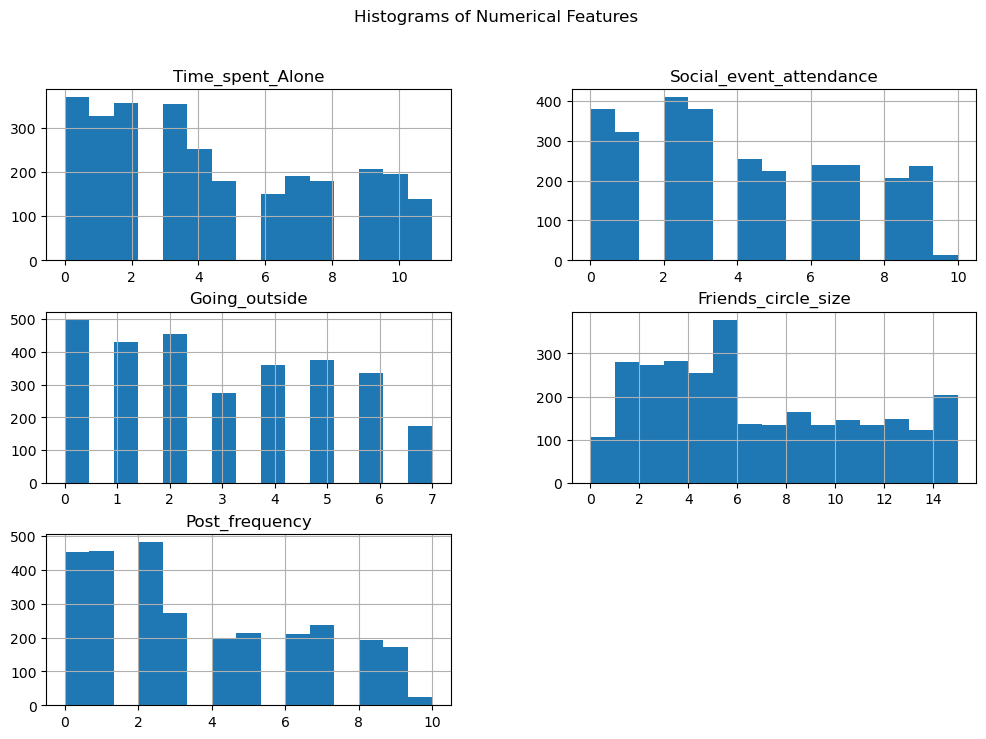

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[num_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()


<div style="background-color:#e6f7ff; padding:15px; border-radius:10px;">

<h2 style="color:#0066cc;">Understanding Histograms of Numerical Features</h2>

<p style="color:#333333; font-size:16px;">
The histogram of <strong style="color:#008080;">numerical features</strong> shows the distribution of each numeric variable in your dataset. Each bar represents how many people fall into a certain range (bin) of values for that feature.
</p>

<p style="color:#333333; font-size:16px;"><strong>For example:</strong></p>
<ul style="color:#333333; font-size:16px;">
  <li>📌 If the histogram for <code style="color:#e8fc03;">Time_spent_Alone</code> is <em style="color:#B22222;">skewed right</em>, most people spend less time alone, with a few spending a lot of time alone.</li>
  <li>📌 If <code style="color:#e8fc03;">Social_event_attendance</code> has a <em style="color:#B22222;">peak at low values</em>, most people attend few events.</li>
  <li>📌 A <em style="color:#228B22;">wide spread</em> in <code style="color:#e8fc03;">Friends_circle_size</code> means some people have many friends, others have few.</li>
</ul>

<p style="color:#333333; font-size:16px;"><strong>Histograms help you quickly see:</strong></p>
<ul style="color:#333333; font-size:16px;">
  <li>✔️ The <strong style="color:#00008B;">most common values</strong> (peaks)</li>
  <li>✔️ <strong style="color:#FF4500;">Outliers</strong> (bars far from the rest)</li>
  <li>✔️ Whether the data is <strong style="color:#DA70D6;">balanced or skewed</strong></li>
</ul>

</div>


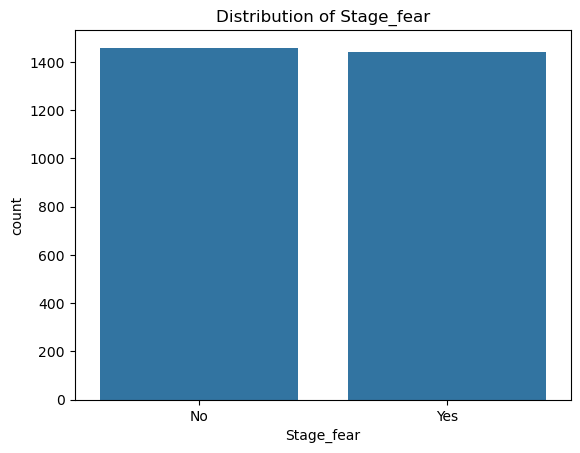

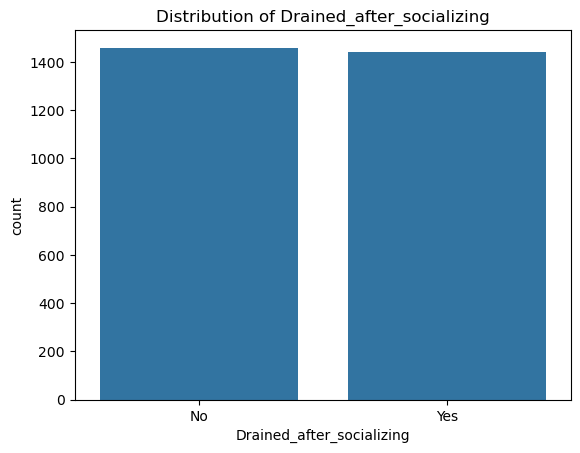

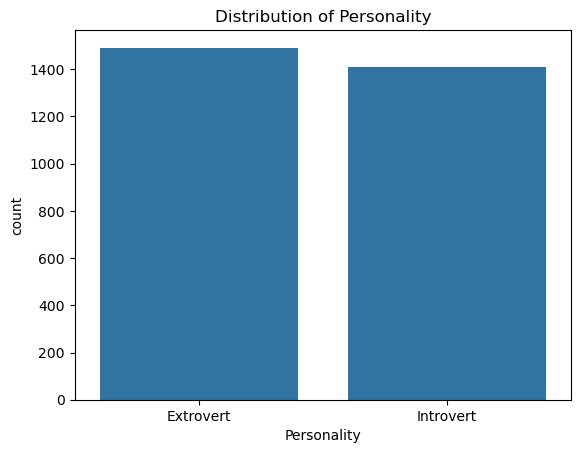

In [313]:
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Categorical Data Is Balanced
This balance helps ensure that classification models are not biased toward one class  </h2>
</div>

<div style="background-color:#f2f7ff; padding:15px; border-radius:10px;">

<h2 style="color:#4169E1;">Boxplots: Feature Distributions by Personality</h2>

<p style="color:#333333; font-size:16px;">
Let's visualize how each <strong style="color:#008080;">numerical feature</strong> varies across 
<strong style="color:#800080;">personality types</strong> using boxplots. This helps us understand 
the impact of each feature on the <code style="color:#e8fc03;">Personality</code> column.
</p>

<ul style="color:#333333; font-size:16px;">
  <li>📌 Each boxplot shows the distribution of a feature for <strong style="color:#DC143C;">Introverts</strong> vs. <strong style="color:#228B22;">Extroverts</strong>.</li>
  <li>📉 The <strong style="color:#00008B;">central line</strong> in each box represents the <strong style="color:#B8860B;">median</strong>.</li>
  <li>📦 The box edges show the <em style="color:#DA70D6;">interquartile range (IQR)</em>, giving insight into spread and variability.</li>
  <li>⚠️ <strong style="color:#FF4500;">Outliers</strong> and differences in medians highlight which features best distinguish personality groups.</li>
</ul>

<p style="color:#333333; font-size:16px;">
These visualizations provide insights into which <strong style="color:#20B2AA;">social behavior features</strong> 
are most influential in distinguishing between <strong style="color:#DC143C;">Introverts</strong> and 
<strong style="color:#228B22;">Extroverts</strong>.
</p>

</div>


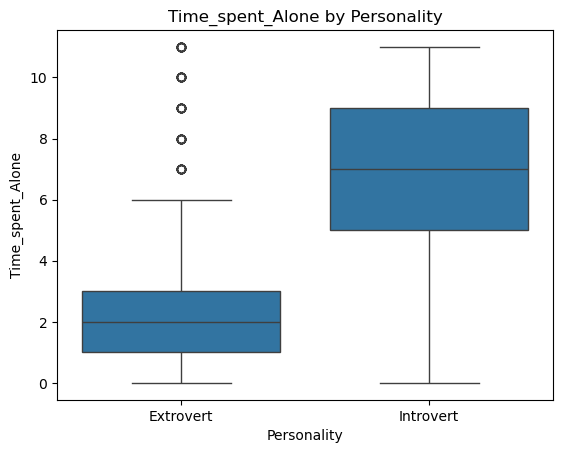

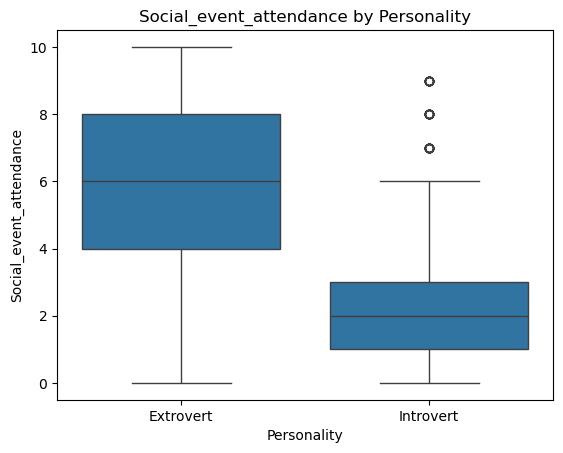

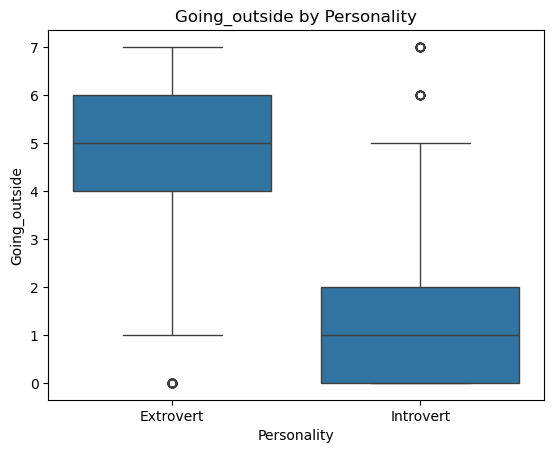

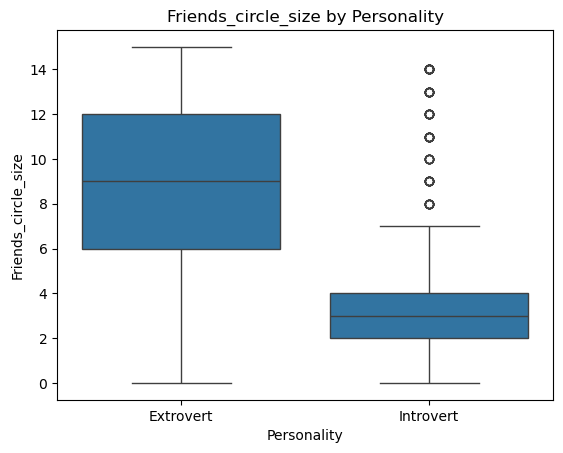

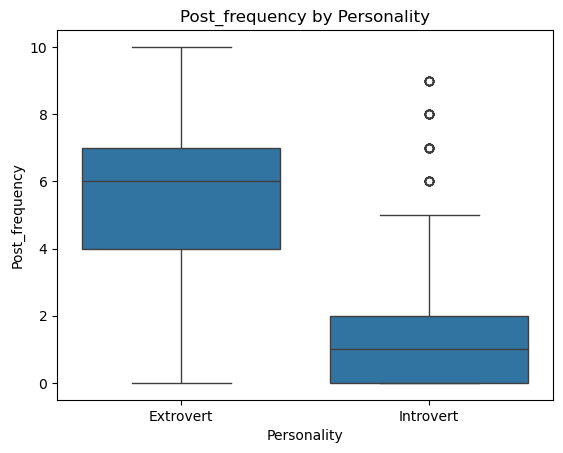

In [314]:
for col in num_cols:
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} by Personality')
    plt.show()


#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Correlation Matrix</h2>
</div>

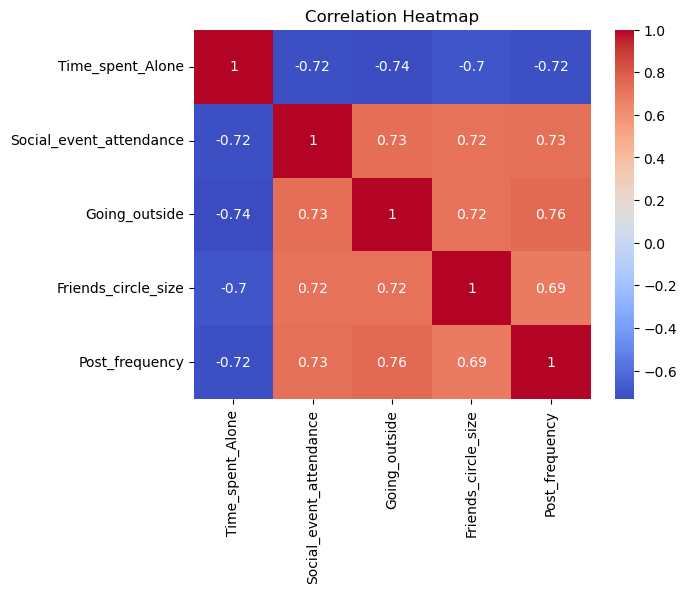

In [315]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<div style="background-color:#fff9f0; padding:20px; border-radius:10px;">

<h3 style="color:#d2691e;">🔍 <strong>Correlation Insights</strong></h3>

<table style="width:100%; border-collapse:collapse; font-size:16px;">
  <thead>
    <tr style="background-color:#ffdead; color:#000;">
      <th style="padding:8px; border:1px solid #ccc;">Feature Pair</th>
      <th style="padding:8px; border:1px solid #ccc;">Correlation</th>
      <th style="padding:8px; border:1px solid #ccc;">Insight</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Time_spent_Alone & others</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#B22222;">~ -0.72 to -0.75</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">Strong negative correlation with all other social features. Indicates less social activity for those who spend more time alone.</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Going_outside & Post_frequency</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#228B22;">0.77</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">People who go outside more often tend to post more frequently.</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Social_event_attendance & Going_outside</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#228B22;">0.75</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">Expected—attending social events likely involves going out.</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Social_event_attendance & Post_frequency</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#228B22;">0.75</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">More socially active people also post more online.</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Friends_circle_size & Social traits</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#228B22;">~ 0.71–0.74</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">Larger friend groups are positively related to being more socially active.</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:8px; border:1px solid #ccc;"><strong style="color:#8A2BE2;">Post_frequency & other traits</strong></td>
      <td style="padding:8px; border:1px solid #ccc; color:#228B22;">~ 0.71–0.77</td>
      <td style="padding:8px; border:1px solid #ccc;color:#fc6f03;">Strong positive relationship—posting frequency reflects general extroversion.</td>
    </tr>
  </tbody>
</table>

<hr style="margin:20px 0;">

<h3 style="color:#cc6600;">📌 Summary</h3>

<ul style="color:#333333; font-size:16px;">
  <li>🔹 <strong style="color:#8B0000;">Introverts</strong>: Higher <code style="color:#8A2BE2;">Time_spent_Alone</code>, lower scores in social metrics.</li>
  <li>🔹 <strong style="color:#006400;">Extroverts</strong>: More events, going outside, friends, and online activity.</li>
</ul>

</div>


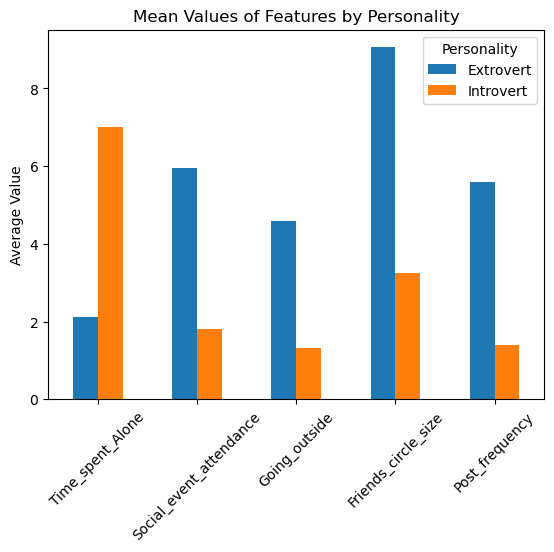

In [316]:
df.groupby('Personality')[num_cols].mean().T.plot(kind='bar')
plt.title("Mean Values of Features by Personality")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


<div style="background-color:#f0fff4; padding:20px; border-radius:12px;">

<h2 style="color:#228B22;">🔍 <strong>Summary: Personality-Based Feature Comparison</strong></h2>

<table style="width:100%; border-collapse:collapse; font-size:16px;">
  <thead>
    <tr style="background-color:#c6f6d5; color:#004225;">
      <th style="padding:10px; border:1px solid #ccc;">Feature</th>
      <th style="padding:10px; border:1px solid #ccc;">Extroverts (↑)</th>
      <th style="padding:10px; border:1px solid #ccc;">Introverts (↓)</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color:#ffffff;">
      <td style="padding:10px; border:1px solid #ccc;"><strong style="color:#008080;">Time_spent_Alone</strong></td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Spend significantly less time alone</td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Spend more time alone</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:10px; border:1px solid #ccc;"><strong style="color:#008080;">Social_event_attendance</strong></td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Attend more events</td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Attend fewer events</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:10px; border:1px solid #ccc;"><strong style="color:#008080;">Going_outside</strong></td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Go out more frequently</td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Prefer staying indoors</td>
    </tr>
    <tr style="background-color:#f9f9f9;">
      <td style="padding:10px; border:1px solid #ccc;"><strong style="color:#008080;">Friends_circle_size</strong></td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Have significantly larger friend circles</td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Smaller circles of friends</td>
    </tr>
    <tr style="background-color:#ffffff;">
      <td style="padding:10px; border:1px solid #ccc;"><strong style="color:#008080;">Post_frequency</strong></td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Post more often (likely active on social media)</td>
      <td style="padding:10px; border:1px solid #ccc;color:#7229ba;">Lower posting frequency</td>
    </tr>
  </tbody>
</table>

<hr style="margin:20px 0;">

<h3 style="color:#006400;">🧠 Interpretation</h3>

<ul style="font-size:16px; color:#333333;">
  <li>🌟 <strong style="color:#008000;">Extroverts</strong> are <em>socially active</em>, outgoing, and expressive online.</li>
  <li>🌙 <strong style="color:#8B0000;">Introverts</strong> are more solitary and selective in social interactions—both online and offline.</li>
</ul>

</div>


In [317]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,Extrovert
1,9,Yes,0,0,Yes,0,3,Introvert
2,9,Yes,1,2,Yes,5,2,Introvert
3,0,No,6,7,No,14,8,Extrovert
4,3,No,9,4,No,8,5,Extrovert


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2900 non-null   Int64   
 1   Stage_fear                 2900 non-null   object  
 2   Social_event_attendance    2900 non-null   Int64   
 3   Going_outside              2900 non-null   Int64   
 4   Drained_after_socializing  2900 non-null   object  
 5   Friends_circle_size        2900 non-null   Int64   
 6   Post_frequency             2900 non-null   Int64   
 7   Personality                2900 non-null   category
dtypes: Int64(5), category(1), object(2)
memory usage: 175.8+ KB


#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Feature Enginerring </h2>
</div>

In [319]:
df['High_Engagement'] = (
    (df['Social_event_attendance'] > 5) &
    (df['Friends_circle_size'] > 10) &
    (df['Post_frequency'] > 5)
).astype(int)


#
<div style="background: linear-gradient(135deg, rgb(34, 22, 71), rgb(9, 74, 104)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Encoding the Categorical Features </h2>
</div>

In [320]:
#label encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    df[col] = le.fit_transform(df[col])
#check the data types after encoding
print(df.dtypes)

Time_spent_Alone             Int64
Stage_fear                   int64
Social_event_attendance      Int64
Going_outside                Int64
Drained_after_socializing    int64
Friends_circle_size          Int64
Post_frequency               Int64
Personality                  int64
High_Engagement              int64
dtype: object


#
<div style="background: linear-gradient(135deg, rgb(222, 190, 10), rgb(226, 144, 2)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Now Lets Build Our ML Model </h2>
</div>

#
<div style="background: linear-gradient(135deg, rgb(0, 50, 11), rgb(32, 111, 44)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">We Will Be Using Multiiple Models For Our Classification Model </h2>
</div>

In [321]:
#import the models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [322]:
# ----- Split Data -----
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [323]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Prepare models for classification
models_multi = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(decision_function_shape='ovr', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Results dictionary
results_multi = {}

# Fit and evaluate each model
for name, model in models_multi.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    results_multi[name] = acc


Logistic Regression Accuracy: 0.9293
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Random Forest Accuracy: 0.9190
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580


Gradient Boosting Accuracy: 0.9293
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.9

#
<div style="background: linear-gradient(135deg, rgb(39, 24, 84), rgb(32, 4, 72)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">So Logistic Regression Perform Very well Compare To Others Lets See With Confusion Matrix </h2>
</div>


Logistic Regression Test Accuracy: 0.9293
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



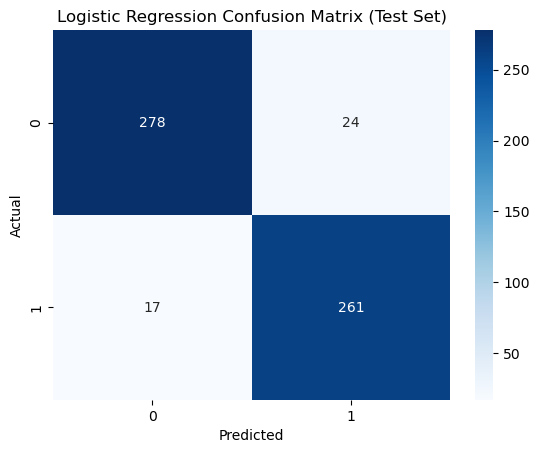

In [324]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate only Logistic Regression on test set
logreg_model = models_multi["Logistic Regression"]
test_preds = logreg_model.predict(X_test)
print(f"\nLogistic Regression Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")
print(classification_report(y_test, test_preds))
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#
<div style="background: linear-gradient(135deg, rgb(25, 86, 115), rgb(2, 128, 139)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">Create a sample input for prediction using the best model </h2>
</div>

In [332]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,High_Engagement
0,4,0,4,6,0,13,5,0,0
1,9,1,0,0,1,0,3,1,0
2,9,1,1,2,1,5,2,1,0
3,0,0,6,7,0,14,8,0,1
4,3,0,9,4,0,8,5,0,0


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Time_spent_Alone           2900 non-null   Int64
 1   Stage_fear                 2900 non-null   int64
 2   Social_event_attendance    2900 non-null   Int64
 3   Going_outside              2900 non-null   Int64
 4   Drained_after_socializing  2900 non-null   int64
 5   Friends_circle_size        2900 non-null   Int64
 6   Post_frequency             2900 non-null   Int64
 7   Personality                2900 non-null   int64
 8   High_Engagement            2900 non-null   int64
dtypes: Int64(5), int64(4)
memory usage: 218.2 KB


In [329]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,High_Engagement
count,2900.0,2900.000000,2900.0,2900.0,2900.000000,2900.0,2900.0,2900.000000,2900.000000
mean,4.494828,0.496897,3.942759,3.0,0.496897,6.235172,3.552069,0.485862,0.080345
std,3.441971,0.500077,2.875987,2.221597,0.500077,4.237255,2.894794,0.499886,0.271873
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,2.0,0.000000,2.0,1.0,0.000000,3.0,1.0,0.000000,0.000000
50%,4.0,0.000000,3.0,3.0,0.000000,5.0,3.0,0.000000,0.000000
75%,7.0,1.000000,6.0,5.0,1.000000,10.0,6.0,1.000000,0.000000
max,11.0,1.000000,10.0,7.0,1.000000,15.0,10.0,1.000000,1.000000


In [334]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,High_Engagement
0,4,0,4,6,0,13,5,0,0
1,9,1,0,0,1,0,3,1,0
2,9,1,1,2,1,5,2,1,0
3,0,0,6,7,0,14,8,0,1
4,3,0,9,4,0,8,5,0,0
5,1,0,7,5,0,6,6,0,0
6,4,0,9,3,0,7,7,0,0
7,2,0,8,4,0,7,8,0,0
8,10,1,1,3,1,0,3,1,0
9,0,0,8,6,0,13,8,0,1


In [335]:
# Create a sample input for prediction (values should match the order and scale of X's columns)
sample_input = pd.DataFrame([{
    'Time_spent_Alone': 1,
    'Stage_fear': 0,  # 0 or 1, as per label encoding
    'Social_event_attendance': 7,
    'Going_outside': 5,
    'Drained_after_socializing': 0,  # 0 or 1, as per label encoding
    'Friends_circle_size': 6,
    'Post_frequency': 6,
    'High_Engagement': 0
}])

In [ ]:
#SAVE THE BEST MODEL
import joblib
joblib.dump(model, 'best_model.pkl')
# Load the model
loaded_model = joblib.load('best_model.pkl')

In [330]:
# Save the model using joblib
joblib.dump(loaded_model, 'best_model.joblib')


['best_model.joblib']

In [336]:
#load the joblib model
from joblib import load
model = load('personality_model.joblib')
# Make a prediction using the loaded model
predicted_personality = model.predict(sample_input)
print(f"Predicted Personality: {predicted_personality[0]}")  # Output the predicted personality class
# Save the model using joblib


Predicted Personality: 0


In [327]:

# Predict using the loaded model
loaded_sample_pred = loaded_model.predict(sample_input)
# Map encoded prediction to original label
loaded_sample_pred = loaded_model.classes_[loaded_sample_pred]
print("Loaded Model Prediction (encoded):", loaded_sample_pred[0])
print("Loaded Model Prediction (label):", le.inverse_transform(loaded_sample_pred)[0])


Loaded Model Prediction (encoded): 1
Loaded Model Prediction (label): Introvert
